# Loading Network model and classify images

In [1]:
import numpy as np

import torch
from torch import nn

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from MNIST_Fashion_class import Network 
import helper

### Load dataset

In [2]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), 
                                                     (0.5, 0.5, 0.5))])

# Download and load
dataset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, 
                                 transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

The checkpoint has all the necessary information to rebuild the trained model. Similarly, we can write a function to load checkpoints. 

In [3]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = Network(checkpoint['input_size'],
                    checkpoint['output_size'],
                    checkpoint['hidden_layers'])
    model.load_state_dict(checkpoint['state_dict'])
    
    return model

### Checking network structure.

In [4]:
model = load_checkpoint('F_MNIST_checkpoint.pth')
print(model)

Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): Linear(in_features=256, out_features=128, bias=True)
    (2): Linear(in_features=128, out_features=64, bias=True)
  )
  (output): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.5)
)


### Classify an image

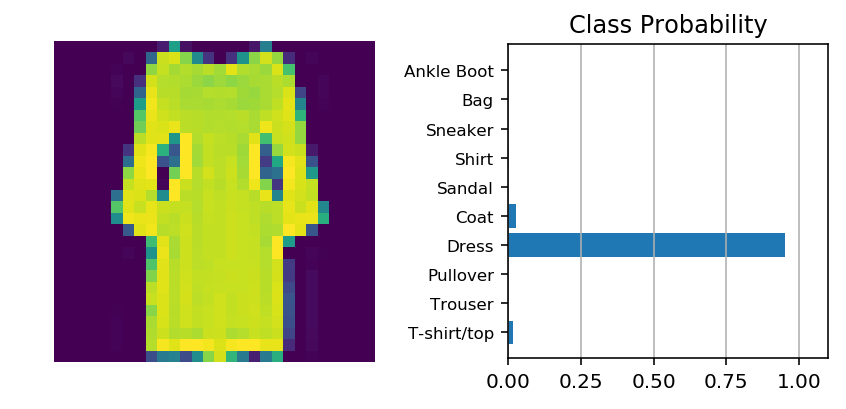

In [7]:
images, labels = next(iter(dataloader))
img = images[0].view(1, 784)

ps = torch.exp(model(img))
helper.view_classify(img.view(1,28,28), ps, version='Fashion')